<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 4. MLP avanzado</font></h1>

<h1><font color="#113D68" size=4>5. Optimización con tasas de aprendizaje</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Introducción](#section1)
* [2. Dataset Ionosphera](#section2)
* [3. Tasa de aprendizaje basada en el tiempo](#section3)
* [4. Tasa de aprendizaje basada en caídas (drop)](#section4)
* [5. Consejos al utilizar la planificación de aprendizaje](#section5)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En esta lección, aprenderemos a usar una programación con diferentes de tasas de aprendizaje. Después de completar esta lección, sabrá:
* El beneficio de programar tasas de aprendizaje.
* Cómo configurar y evaluar una tasa de aprendizaje basada en el tiempo.
* Cómo configurar y evaluar una tasa de aprendizaje basado en _drop._

In [ ]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Introducción</font>

La adaptación más simple y quizás más utilizada de las tasas de aprendizaje durante el entrenamiento son las técnicas que reducen la tasa de aprendizaje con el tiempo. Estos tienen la ventaja de realizar grandes cambios al comienzo del procedimiento de entrenamiento cuando se utilizan valores de tasa de aprendizaje más grandes, y disminuyen la tasa de aprendizaje de manera que se realicen una tasa menor y, por lo tanto, actualizaciones de entrenamiento más pequeñas a los pesos más adelante en el procedimiento de entrenamiento. 

Dos planificaciones de tasas de aprendizaje populares son:
* Disminución de la tasa de aprendizaje gradualmente según la época.
* Disminución de la tasa de aprendizaje usando grandes drops en épocas específicas.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Dataset Ionosphera</font>

Es un problema de clasificación binaria donde los casos positivos _(g_ para el bien) muestran evidencia de algún tipo de estructura en la ionosfera y los casos negativos _(b_ para el mal) no. 

Hay 34 atributos y 351 observaciones.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre el dataset [Ionosphere](https://archive.ics.uci.edu/ml/datasets/Ionosphere)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Tasa de aprendizaje basada en el tiempo</font>

El algoritmo de optimización `SGD` tiene un argumento llamado `decay`. Este argumento se utiliza de la siguiente manera:

$$
    LearningRate = LearningRate \times \frac{1}{1+decay \times epoch}
$$

Cuando el argumento de `decay` es cero (el valor predeterminado), esto no tiene ningún efecto en la tasa de aprendizaje (por ejemplo, 0,1).

```
    LearningRate = (0.1 * 1)/(1 + 0.0 * 1)
    LearningRate = 0.1
```

Cuando se especifica el argumento `decay`, disminuirá la tasa de aprendizaje de la época anterior en la cantidad fija dada. Por ejemplo, si usamos el valor de la tasa de aprendizaje inicial de 0.1 y la decay de 0.001, las primeras 5 épocas adaptarán la tasa de aprendizaje de la siguiente manera:
```
    Epoch Learning Rate
      1    0.1
      2    0.0999000999
      3    0.0997006985
      4    0.09940249103
      5    0.09900646517

```

Extender esto a 100 épocas producirá el siguiente gráfico de tasa de aprendizaje (eje y) versus época (eje x):

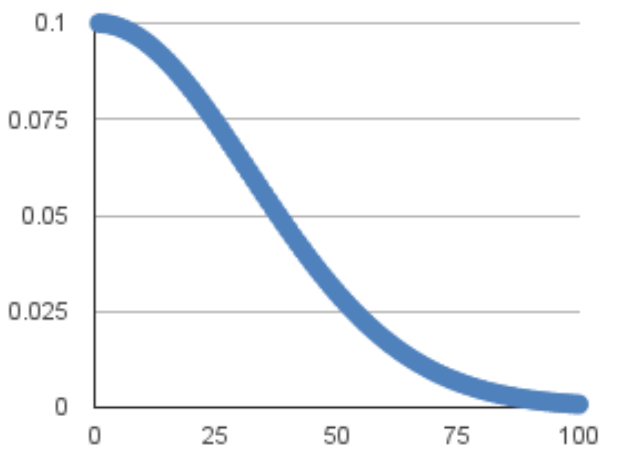

Puede crear una buena planificación predeterminada configurando el valor de `decay` de la siguiente manera:
```
    Decay = LearningRate / Epochs
    Decay = 0.1 / 100
    Decay = 0.001
```

Veamos un ejemplo en un modelo con las siguientes características 
1. Red neuronal con 1 capa oculta con 34 neuronas y utilizando la función de activación ReLu. 
2. La capa de salida tiene una sola neurona y usa la función de activación sigmoidea. 
3. La tasa de aprendizaje para el `SGD` se ha establecido en un valor más alto de 0,1. 
4. Entrenamiento para 50 épocas y el argumento `decay` se ha establecido en 0,002, calculado como $\frac{0.1}{50}$. 
6. Usamos un `momentum` de 0.8. 

In [ ]:
# Time Based Learning Rate Decay
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder


# load dataset
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/CursoDeepLearning/Datasets/ionosphere.csv"

dataframe= pd.read_csv(path, sep=',')
df_values=dataframe.values

# split into input (X) and output (Y) variables
x= df_values[:,0:34].astype(float)
y= df_values[:,34]

# encode class values as integers
encoder= LabelEncoder()
encoder.fit(y)
encoded_y= encoder.transform(y)
#encoded_y

# create model
model= Sequential()
model.add(Dense(34,input_dim=34,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
epoch= 50
lr= 0.1
decay_rate= lr/epoch
momentum= 0.8

sgd= SGD(learning_rate=lr, momentum=momentum, decay=decay_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy']) 

# Fit the model
model.fit(x,encoded_y, validation_split=0.33, epochs=epoch, batch_size=28, verbose=2 )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
9/9 - 1s - loss: 0.6991 - accuracy: 0.5812 - val_loss: 0.5635 - val_accuracy: 0.7155
Epoch 2/50
9/9 - 0s - loss: 0.5092 - accuracy: 0.7949 - val_loss: 0.3053 - val_accuracy: 0.9483
Epoch 3/50
9/9 - 0s - loss: 0.4191 - accuracy: 0.8462 - val_loss: 0.3820 - val_accuracy: 0.9483
Epoch 4/50
9/9 - 0s - loss: 0.3051 - accuracy: 0.9145 - val_loss: 0.2649 - val_accuracy: 0.9828
Epoch 5/50
9/9 - 0s - loss: 0.2451 - accuracy: 0.9103 - val_loss: 0.2347 - val_accuracy: 0.9655
Epoch 6/50
9/9 - 0s - loss: 0.2214 - accuracy: 0.9316 - val_loss: 0.1908 - val_accuracy: 0.9741
Epoch 7/50
9/9 - 0s - loss: 0.1761 - accuracy: 0.9530 - val_loss: 0.1192 - val_accuracy: 0.9828
Epoch 8/50
9/9 - 0s - loss: 0.1581 - accuracy: 0.9573 - val_loss: 0.1572 - val_accuracy: 0.9741
Epoch 9/50
9/9 - 0s - loss: 0.1449 - accuracy: 0.9573 - val_loss: 0.1121 - val_accuracy: 0.9828
Epoch 1

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Tasa de aprendizaje basada en caídas (drop)</font>

A menudo, este método se implementa reduciendo la tasa de aprendizaje a la mitad cada número fijo de épocas. 

Por ejemplo, podemos tener una tasa de aprendizaje inicial de 0,1 y reducirla en un factor de 0,5 cada 10 épocas. Las primeras 10 épocas de entrenamiento usarían un valor de 0.1, en las siguientes 10 épocas se usaría una tasa de aprendizaje de 0.05, y así sucesivamente. 

El gráfico quedaría así con tasa de aprendizaje (eje y) frente a la época (eje x).

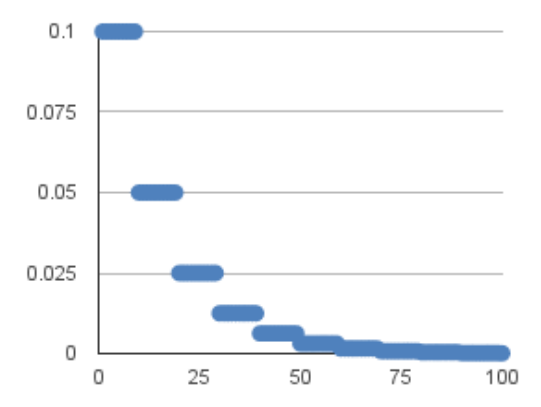

Podemos implementar esto en Keras usando la llamada (callback) `LearningRateScheduler` al ajustar el modelo. `LearningRateScheduler` nos permite definir una función para llamar que toma el número de época como argumento y devuelve la tasa de aprendizaje para usar en el SGD.

En el siguiente código, usamos el mismo ejemplo que antes de una sola red de capa oculta. Se define una nueva función `step_decay()` que implementa la ecuación:

$$
    LearningRate = InitialLearningRate \times DropRate^{floor(\frac{1+ Epoch }{EpochDrop})}
$$

Donde:
* `InitialLearningRate` es la tasa de aprendizaje al comienzo de la ejecución 
* `EpochDrop` es la frecuencia con la que se reduce la tasa de aprendizaje en épocas y 
* `DropRate` es cuánto se reduce la tasa de aprendizaje cada vez que se elimina.

In [ ]:
# Drop-Based Learning Rate Decay
import pandas as pd
import math as mth

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# learning rate schedule
def step_decay(epoch):
  initial_lrate= 0.1
  drop= 0.5
  epochs_drop= 10
  lrate= initial_lrate * mth.pow(drop, mth.floor((1+epoch)/epochs_drop))
  return lrate

def step_decay_p(epoch):
  initial_lrate= 0.1
  drop= 0.5
  epochs_drop= 10
  lrate= initial_lrate * mth.pow(drop, mth.floor(1+epoch)/epochs_drop)
  return lrate

# load dataset
from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/MyDrive/CursoDeepLearning/Datasets/ionosphere.csv"

dataframe= pd.read_csv(path, sep=',')
df_values=dataframe.values

# split into input (X) and output (Y) variables
x= df_values[:,0:34].astype(float)
y= df_values[:,34]

# encode class values as integers
encoder= LabelEncoder()
encoder.fit(y)
encoded_y= encoder.transform(y)
#encoded_y

# create model
model= Sequential()
model.add(Dense(34,input_dim=34,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
sgd= SGD(learning_rate=lr, momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy']) 

# learning schedule callback
lrate= LearningRateScheduler(step_decay)
callback_list= [lrate]

# Fit the model
model.fit(x,encoded_y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callback_list,verbose=2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
9/9 - 0s - loss: 0.6141 - accuracy: 0.7179 - val_loss: 0.4069 - val_accuracy: 0.9224
Epoch 2/50
9/9 - 0s - loss: 0.3772 - accuracy: 0.8632 - val_loss: 0.3043 - val_accuracy: 0.9655
Epoch 3/50
9/9 - 0s - loss: 0.2443 - accuracy: 0.9231 - val_loss: 0.1252 - val_accuracy: 0.9828
Epoch 4/50
9/9 - 0s - loss: 0.1790 - accuracy: 0.9231 - val_loss: 0.1963 - val_accuracy: 0.9483
Epoch 5/50
9/9 - 0s - loss: 0.1504 - accuracy: 0.9530 - val_loss: 0.1626 - val_accuracy: 0.9569
Epoch 6/50
9/9 - 0s - loss: 0.1314 - accuracy: 0.9530 - val_loss: 0.0897 - val_accuracy: 0.9914
Epoch 7/50
9/9 - 0s - loss: 0.1090 - accuracy: 0.9701 - val_loss: 0.1510 - val_accuracy: 0.9828
Epoch 8/50
9/9 - 0s - loss: 0.0937 - accuracy: 0.9701 - val_loss: 0.0591 - val_accuracy: 0.9914
Epoch 9/50
9/9 - 0s - loss: 0.1000 - accuracy: 0.9615 - val_loss: 0.0923 - val_accuracy: 0.9914
Epoch 1

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Consejos al utilizar la planificación de aprendizaje</font>

Veamos algunos consejos a tener en cuenta al utilizar la planficación de la tasa de aprendizaje.
* **Incrementar la tasa de aprendizaje inicial**. Debido a que la tasa de aprendizaje disminuirá, comience con un valor mayor desde el cual disminuir.
* **Utilice un gran momentum**.
* **Experimente con diferentes planificaciones**. 

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>